In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import networkx as nx
from statistics import mean, median,variance,stdev

In [2]:
def csv_to_list(path: Path) -> list[tuple[int, int]]: 
    assert path.exists()
    assert path.suffix == ".csv"
    
    ret: list[tuple[int, int]] = []
    with open(path, "r") as f: 
        while True:
            s = f.readline()
            if s == "": 
                break
            else: 
                l = s.replace("\n", "").split(",")
                assert len(l) == 2
                ret.append((int(l[0]), int(l[1])))
    return ret 


def csv_to_graph(path : Path) -> nx.Graph: 
    data = csv_to_list(path)
    G = nx.Graph()
    G.add_edges_from(data)
    return G


def showNetwork(G, node_value=None):
  #描画する
  # 描画サイズ
  plt.figure(figsize=(10,10))
  # ノードをバネモデルで配置する
  pos = nx.spring_layout(G, k=0.3, seed=0)
  # ノード，エッジ，ラベルの描画
  nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
  if node_value == None:
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
  else:
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color=list(node_value.values()), cmap=plt.cm.Reds, edgecolors="black")
  
  # 描画
  plt.show()
  
  
# 課題に必要ものをまとめて出してしまう
def work(path: Path) -> None:
  G = csv_to_graph(path)
  
  showNetwork(G)
  
  print(f'クラスター係数 = {nx.average_clustering(G)}')
  print(f'ネットワーク密度 = {nx.density(G)}')
  print(f'平均経路長 = {nx.average_shortest_path_length(G)}')
  print(f'ネットワークの直径 = {nx.diameter(G)}') 
  
  degree = G.degree #次数を取得
  d_ary = dict(degree).values() #次数のリスト
  print(f'最大次数 = {max(d_ary)}')
  print(f'平均次数 = {mean(d_ary)}')

# karate

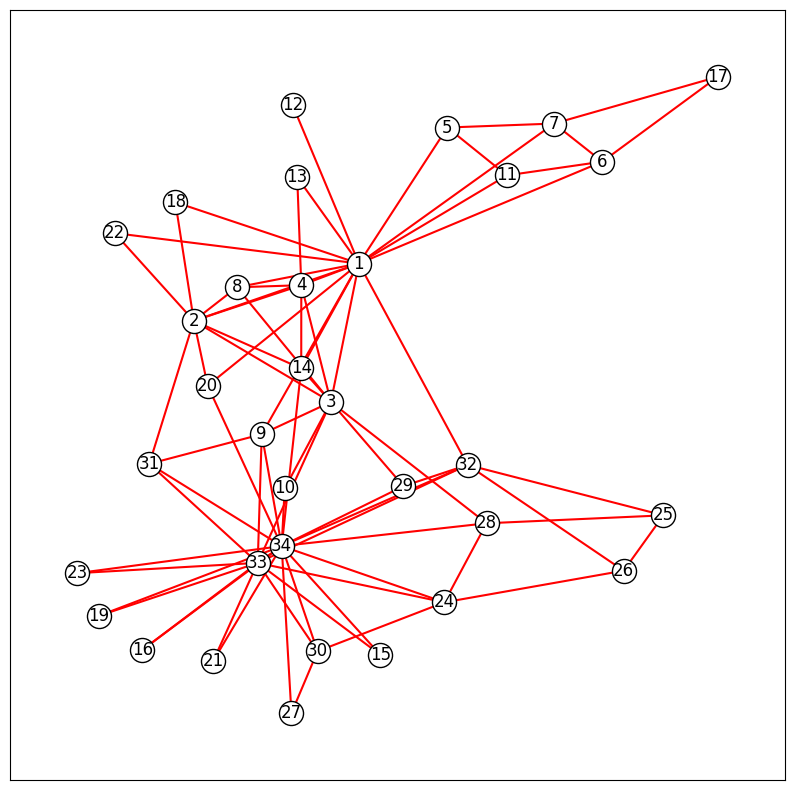

クラスター係数 = 0.5706384782076824
ネットワーク密度 = 0.13903743315508021
平均経路長 = 2.408199643493761
ネットワークの直径 = 5
最大次数 = 17
平均次数 = 4.588235294117647


In [3]:
karate_path = Path("./data/work_2_karate.csv")
work(karate_path)

# baseball

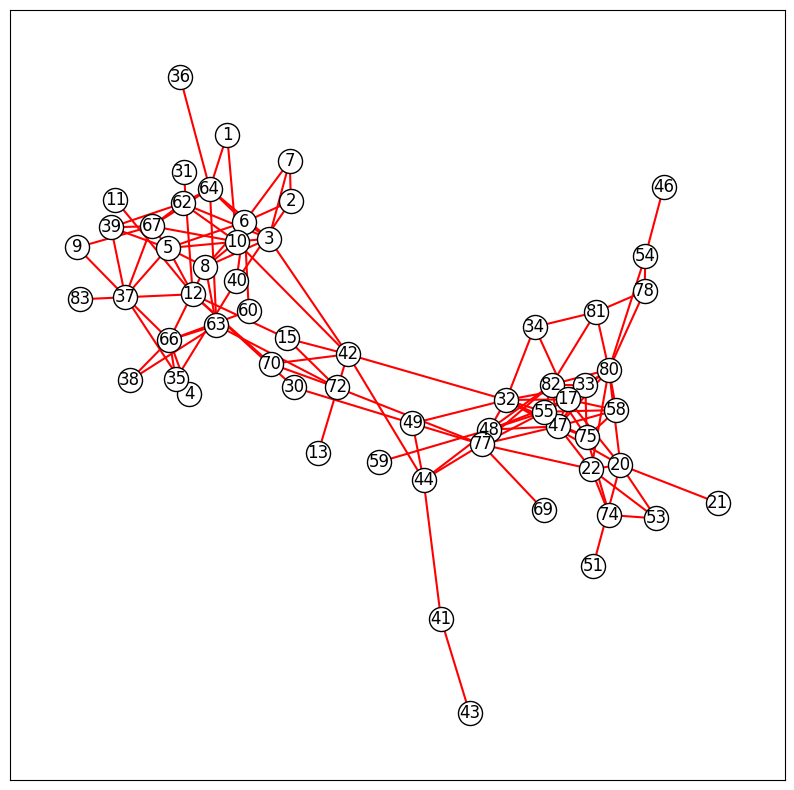

クラスター係数 = 0.29343674843674833
ネットワーク密度 = 0.0768361581920904
平均経路長 = 3.637853107344633
ネットワークの直径 = 8
最大次数 = 11
平均次数 = 4.533333333333333


In [4]:
baseball_path = Path("./data/work_2_baseball.csv")
work(baseball_path)